# Uma Breve Análise Sobre a Violência no Estado de Minas Gerais no Ano de 2019

É um fato de conhecimento comum que o crime atinge o Brasil em sua totalidade. 

Atualmente a lei de acesso à informação e a conscientização dos orgão públicos, proporciona a disponibilização de diversas fontes de dados.

A Secretaria de Segurança Pública do Estado de Minas Gerais disponibiliza diversos dados sobre violência através do próprio portal neste [link](http://www.seguranca.mg.gov.br/2018-08-22-13-39-06/dados-abertos). 

Neste projeto nós vamos fazer uma breve análise e tirar algumas conclusões sobre o crime no estado de Minas Gerais em 2019.




## Obtenção dos Dados

Os dados foram obtidos diretamente do portal da Secretaria de Segurança Pública do Estado de Minas Gerais onde possui diversos dados abertos sobre a violência no estado. 

Utilizaremos uma base de dados da criminalidade violenta nos 853 municípios do estado de Minas Gerais tendo como fonte o Observatório de Segurança Pública (Sejusp).

A base de dados utilizada neste trabalho pode ser baixada diretamente deste [link](http://www.seguranca.mg.gov.br/images/2020/Junho/Banco%20Crimes%20Violentos%20Armazm%20-%20Atualizado%20Maio%202020.csv). 



### Importando os Dados



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/Leilisson/Data_Science/master/Violent_Crimes_Minas_Gerais/CrimesMG.csv",encoding = "cp1252", sep=";")

## Análise Inicial dos Dados

Antes de iniciarmos a exploração dos dados, é preciso obter algumas informações a respeito do nosso dataset, tal como dimensão, as variáveis existentes e o tipo de dado de cada variável.



In [10]:
df.shape #Checar dimensões

(321578, 9)

In [11]:
df.columns #Nome das Variáveis. 

Index(['Registros', 'Natureza', 'Município', 'Cod IBGE', 'Mês ', 'Ano', 'RISP',
       'RISP Nova', 'RMBH'],
      dtype='object')

In [12]:
df.info() #Tipo dos dados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321578 entries, 0 to 321577
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Registros  321578 non-null  int64 
 1   Natureza   321578 non-null  object
 2   Município  321578 non-null  object
 3   Cod IBGE   321578 non-null  int64 
 4   Mês        321578 non-null  int64 
 5   Ano        321578 non-null  int64 
 6   RISP       321578 non-null  int64 
 7   RISP Nova  321578 non-null  int64 
 8   RMBH       321578 non-null  object
dtypes: int64(6), object(3)
memory usage: 22.1+ MB


Vamos ver agora as primeiras entradas do nosso dataset. 

In [13]:
df.head()

,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2018,10,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2018,7,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2018,12,12,NÃO
3,0,Estupro Consumado,ACAIACA,310040,1,2018,12,12,NÃO
4,0,Estupro Consumado,ACUCENA,310050,1,2018,12,12,NÃO


## Pré-processando os Dados


Nós estamos interessados somente nos dados do ano de 2019. Vamos ver então quais anos o nosso dataset abrange.


In [14]:
df.Ano.unique() # verificas valores únicos da coluna Ano. 

array([2018, 2019, 2020])

In [15]:
df_clean = df[df.Ano == 2019]  #Selecionando apenas o ano de 2019
df_clean.Ano.unique()

array([2019])

Na nossa prévia acima das primeiras entradas do nosso dataset, podemos perceber que existem cidades que não possuem registro de certos crimes. Vamos remover essas entradas. 


In [16]:
df_clean = df_clean[df_clean.Registros != 0]; #removendo registros onde não foi computado nenhum crime



Vamos ver agora as dimensões e logo em seguida  as novas primeiras entradas. 



In [17]:
print(df_clean.shape)
df_clean.head()

(11565, 9)


,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
133077,1,Estupro Consumado,AGUAS VERMELHAS,310100,1,2019,15,15,NÃO
133096,1,Estupro Consumado,ANDRADAS,310260,1,2019,18,18,NÃO
133113,1,Estupro Consumado,ARCOS,310420,1,2019,7,7,NÃO
133126,1,Estupro Consumado,BARAO DE COCAIS,310540,1,2019,12,12,NÃO
133131,1,Estupro Consumado,BELA VISTA DE MINAS,310600,1,2019,12,12,NÃO


## Algumas Informações Estatísticas da Violência no Estado de Minas Gerais



### Qual a quantidade de cada crime cometido?

In [18]:
list_of_crimes = df_clean.Natureza.unique()
list_records = {"Natureza": [],
                "Quantidade": []
}
for x in list_of_crimes:
  number_records = df_clean[df_clean.Natureza == x].Registros.sum()
  list_records['Natureza'].append(x)
  list_records['Quantidade'].append(number_records)



In [19]:
df_nat = pd.DataFrame(list_records)
df_nat.set_index('Natureza', inplace=True)
df_nat.sort_values('Quantidade', ascending=False, inplace=True)
df_nat

,Quantidade
Natureza,
Roubo Consumado,54054
Roubo Tentado,3404
Estupro de Vulnerável Consumado,3163
Homicídio Tentado,2855
Homicídio Consumado (Registros),2644
Estupro Consumado,1230
Extorsão Consumado,780
Sequestro e Cárcere Privado Consumado,248
Estupro Tentado,236


###Qual a porcentagem de cada tipo de crime cometido?

In [20]:
df_nat.Quantidade / df_clean.Registros.sum()

Natureza
Roubo Consumado                          0.782314
Roubo Tentado                            0.049266
Estupro de Vulnerável Consumado          0.045778
Homicídio Tentado                        0.041320
Homicídio Consumado (Registros)          0.038266
Estupro Consumado                        0.017802
Extorsão Consumado                       0.011289
Sequestro e Cárcere Privado Consumado    0.003589
Estupro Tentado                          0.003416
Extorsão Tentado                         0.003039
Estupro de Vulnerável Tentado            0.002663
Extorsão Mediante Sequestro Consumado    0.001129
Sequestro e Cárcere Privado Tentado      0.000130
Name: Quantidade, dtype: float64

###Quais cidades possuem a maior incidência de crimes?

In [21]:
list_city = df_clean.Município.unique()
list_records = {
    "Município" : [],
    "Qntde_Total_Crimes": [],
}
for x in list_city:
  num_records  = df_clean[df_clean.Município == x].Registros.sum()
  list_records["Município"].append(x)
  list_records["Qntde_Total_Crimes"].append(num_records)


In [22]:
df_tot_crimes = pd.DataFrame(list_records)
df_tot_crimes.sort_values("Qntde_Total_Crimes", ascending=False, inplace=True)
df_tot_crimes.set_index('Município', inplace=True)
df_tot_crimes.head()

,Qntde_Total_Crimes
Município,
BELO HORIZONTE,19709
CONTAGEM,6940
UBERLANDIA,3357
BETIM,3334
RIBEIRAO DAS NEVES,1978


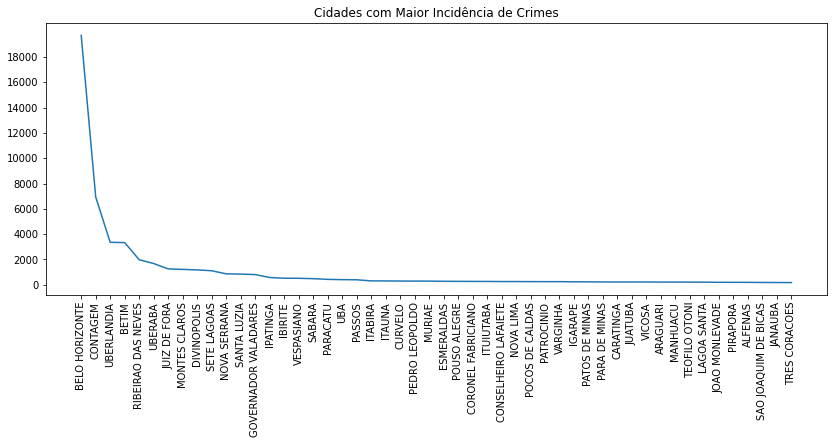

In [23]:
figure = plt.figure(figsize = (14,5))
plt.yticks(np.arange(0,20000,2000))
plt.xticks(rotation=90)
plt.title("Cidades com Maior Incidência de Crimes")
plt.plot(df_tot_crimes.head(50),);


###Qual a porcentagem que as cidades acima representam no total de crimes?

In [24]:
(df_tot_crimes.Qntde_Total_Crimes / df_clean.Registros.sum())[0:50]

Município
BELO HORIZONTE          0.285245
CONTAGEM                0.100441
UBERLANDIA              0.048585
BETIM                   0.048252
RIBEIRAO DAS NEVES      0.028627
UBERABA                 0.024300
JUIZ DE FORA            0.018149
MONTES CLAROS           0.017584
DIVINOPOLIS             0.017006
SETE LAGOAS             0.016050
NOVA SERRANA            0.012505
SANTA LUZIA             0.012201
GOVERNADOR VALADARES    0.011665
IPATINGA                0.008322
IBIRITE                 0.007468
VESPASIANO              0.007410
SABARA                  0.006976
PARACATU                0.006194
UBA                     0.005861
PASSOS                  0.005702
ITABIRA                 0.004429
ITAUNA                  0.004385
CURVELO                 0.004241
PEDRO LEOPOLDO          0.004226
MURIAE                  0.004154
ESMERALDAS              0.003980
POUSO ALEGRE            0.003893
CORONEL FABRICIANO      0.003821
ITUIUTABA               0.003792
CONSELHEIRO LAFAIETE    0.003662


### Quais cidades possuem o maior número de *Estupros Consumados?*

In [25]:
def resumo_crimes(str_crimes):
  df_aux = df_clean[df_clean.Natureza == str_crimes]
  list_records = {
      "Municipio" : [],
      "Quantidade" : [],
  }
  list_city = df_aux.Município.unique()
  for x in list_city:
    list_records["Municipio"].append(x)
    list_records["Quantidade"].append(df_aux[df_aux.Município == x].Registros.sum())

  df_res = pd.DataFrame(list_records)
  df_res = df_res.sort_values('Quantidade', ascending=False)
  df_res.set_index('Municipio', inplace=True)
  return df_res


In [26]:
df_res = resumo_crimes('Estupro Consumado')
df_res.head()

,Quantidade
Municipio,
BELO HORIZONTE,218
CONTAGEM,67
RIBEIRAO DAS NEVES,36
UBERLANDIA,33
GOVERNADOR VALADARES,24


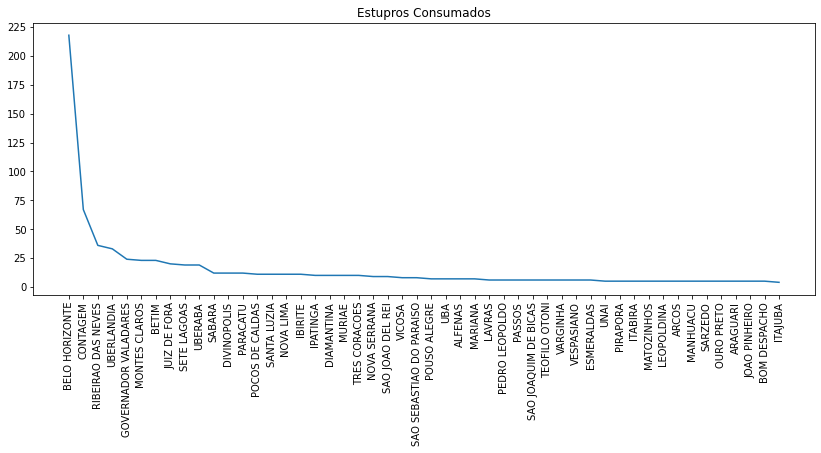

In [27]:
figure = plt.figure(figsize = (14,5))
plt.yticks(np.arange(0,250,25))
plt.xticks(rotation=90)
plt.title("Estupros Consumados")

plt.plot(df_res.head(50),);

###Quais cidades possuem o maior número de *Homicídios Consumados*?

In [28]:
df_res = resumo_crimes('Homicídio Consumado (Registros)')
df_res.head()

,Quantidade
Municipio,
BELO HORIZONTE,354
CONTAGEM,112
BETIM,90
RIBEIRAO DAS NEVES,85
GOVERNADOR VALADARES,76


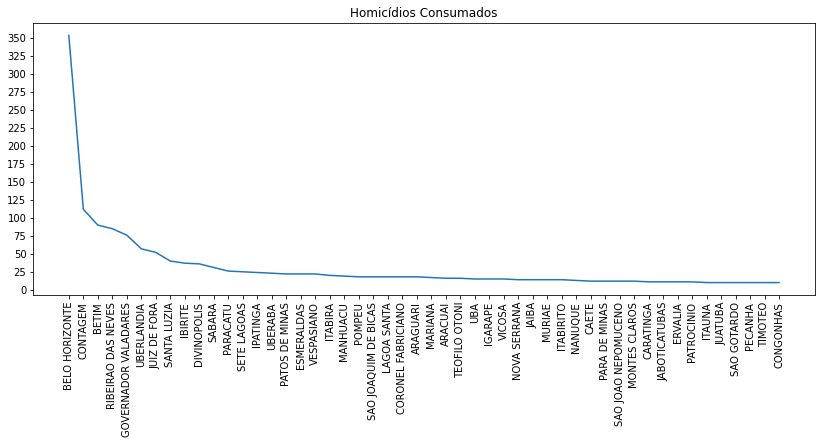

In [29]:
figure = plt.figure(figsize = (14,5))
plt.yticks(np.arange(0,375,25))
plt.xticks(rotation=90)
plt.title("Homicídios Consumados")
plt.plot(df_res.head(50),);

###Quais cidades possuem o maior número de *Estupro de Vulnerável Consumado?*

In [30]:
df_res = resumo_crimes('Estupro de Vulnerável Consumado')
df_res.head(10)

,Quantidade
Municipio,
BELO HORIZONTE,368
CONTAGEM,129
BETIM,78
UBERLANDIA,67
RIBEIRAO DAS NEVES,67
MONTES CLAROS,65
UBERABA,65
DIVINOPOLIS,62
GOVERNADOR VALADARES,60


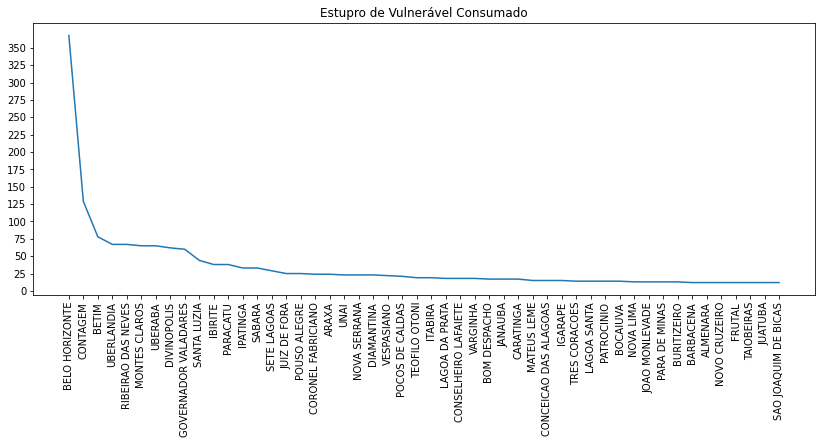

In [31]:
figure = plt.figure(figsize = (14,5))
plt.yticks(np.arange(0,375,25))
plt.xticks(rotation=90)
plt.title("Estupro de Vulnerável Consumado")
plt.plot(df_res.head(50),);

## Conclusão

Com essa pequena análise podemos verificar que as cidades que fazem parde da grande Belo Horizonte possuíam no ano de 2019 a maior taxa de crimes graves com a excessão da cidade de Uberlândia no triângulo mineiro. 